<a href="https://colab.research.google.com/github/youngsiiimba/Digital-Signal-Processing/blob/main/Audio_Processing_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Audio file link: https://freewavesamples.com/files/Yamaha-TG100-Kalimba-C5.wav

In [87]:
import requests
import wave
import numpy as np
import matplotlib.pyplot as plt

In [88]:
url = 'https://freewavesamples.com/files/Yamaha-TG100-Kalimba-C5.wav'
r = requests.get(url, allow_redirects=True)

open('Yamaha-TG100-Kalimba-C5.wav', 'wb').write(r.content)

235756

In [89]:
#This is the file location for the data using goolge colab: https://colab.research.google.com/
file = wave.open('/content/Yamaha-TG100-Kalimba-C5.wav')

###Let's get the number of channels

In [90]:
print(file.getnchannels())

2


###Let's get the sampling rate

In [91]:
S_rate = file.getframerate()
file.getframerate()

44100

###Let's get the number of frames.

In [92]:
n_frames = file.getnframes()
file.getnframes()

58879

###Let's get the sample width

In [93]:
file.getsampwidth()

2

This means that one sample from one channel contains 2 bytes

###Now let's access the data from the frames.

In [94]:
data = file.readframes(-1)
#print("Data for one frame: ", file.readframes(1))
print("Data for all the frames: ", data)

Data for all the frames:  b'\xfe\xff\xf6\xff\xf7\xff\xfd\xff\x06\x00\x16\x00\xf6\xff\x11\x00\x0b\x00\x04\x00\x0b\x00\xfd\xff\t\x00\xfa\xff\x10\x00\n\x00\x06\x00\x0f\x00\x08\x00\x16\x00\x02\x00\x10\x00\x14\x00\x0b\x00\x12\x00\x0c\x00\x0f\x00\x0f\x00\x10\x00\x01\x00\x10\x00\xfa\xff\x02\x00\x05\x00\x0c\x00\xd9\xff\xff\xff\xf1\xff\x16\x00\xf5\xff\xf8\xff\xe2\xff\x8a\xffa\xff\xe9\xfe\xc0\xfe@\xff=\xff\x17\x00*\x00\xaf\x00\xbb\x00<\x005\x00@\xff\x17\xff\r\xff\xd3\xfe\x85\xfff\xffy\x00z\x00\x87\x00\xa6\x00\x98\xfft\xff\xac\xfe\x82\xfe\xba\xfe\x94\xfe\xf5\xff\x04\x00_\x01\xa3\x01\'\x01p\x01x\xff\x89\xff\xbf\xfe\x8c\xfe\xb6\xfe\x93\xfeM\x00:\x00\x06\x01E\x01^\x00s\x00L\xff;\xff\xe1\xfe\xba\xfey\xffp\xffw\x00\x8c\x00\xea\x01T\x02i\x01\xad\x01Z\x00\x83\x00\x7f\xffy\xff9\x00N\x00\xae\x01\x07\x02\xf0\x01V\x02\xaf\x00\xd3\x00\xd6\xfe\xa2\xfe\t\xff\xf8\xfeK\x00Q\x00\x03\x02K\x02&\x02\x92\x02 \x01T\x01\xaa\xff\xa7\xff\xc1\xfe\xab\xfe\xd6\xff\xcb\xff\xff\xff\x06\x00|\xffu\xff~\xfel\xfe\x12\xfe\xe3\xfd?

When we print the data for one frame, we can see from the output above that this is binary data which contains four *bytes*. The first to bytes are for one channel and the other two bytes are for the other channel

###Now let's decode the data to integers

In [95]:
w_data = np.frombuffer(data, np.int16)

In [96]:
print(w_data)

[ -2 -10  -9 ...   0  -2  -3]


###Let's restructure the data 

We'll restructure the data such that one column will represent data taken from one channel and the second column will represent data taken from the second channel

In [97]:
w_data.shape =  -1,2
w_data

array([[ -2, -10],
       [ -9,  -3],
       [  6,  22],
       ...,
       [ -3,  -2],
       [  3,   0],
       [ -2,  -3]], dtype=int16)

We can even transpose the data so there can be two rows instead of two columns

In [98]:
w_data = w_data.T

###Let's get the time duration for our file

In [99]:
print("Time duration in seconds: ", n_frames / S_rate)

Time duration in seconds:  1.335124716553288


###Let's generate a time sequence

In [100]:
duration_between_samples = 1 / float(S_rate)
t_seq = np.arange(0, n_frames/float(S_rate), duration_between_samples)

###Let's plot our signal

Text(0.5, 1.0, 'Data from first channel')

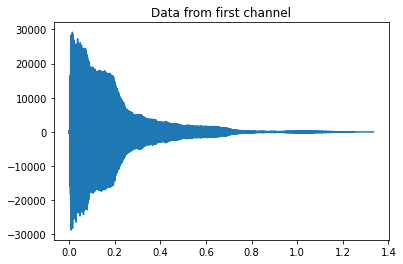

In [101]:
plt.plot(t_seq, w_data[0])
plt.title('Data from first channel')

Text(0.5, 1.0, 'Data from second channel')

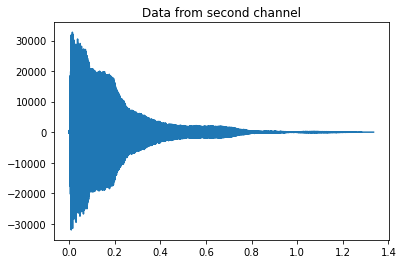

In [102]:
plt.plot(t_seq, w_data[1])
plt.title('Data from second channel')